In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/ColabNotebooks/Data/MTech_Data/Exp6_Myo5_20200221/"
fingers= ['1_fingerspread','2_doubletap','3_wavein', '4_waveout','5_fist']
path = "/content/drive/MyDrive/ColabNotebooks/Data/SmallTrial/Day2/Multiple_PressAndRelease_5Sec/"
fingers = ['1T', '2I', '3M', '4R', '5L']

In [ ]:
import pandas
import datetime
import os
import math
import glob
import  numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from statsmodels import robust
from sklearn.metrics import accuracy_score 
import cv2
%matplotlib inline

min = 196, max=622


(array([ 0.,  1., 54., 64., 63., 63., 29., 21.,  4.,  1.]),
 array([  0, 100, 200, 250, 275, 300, 350, 400, 500, 600, 700]),
 <a list of 10 Patch objects>)

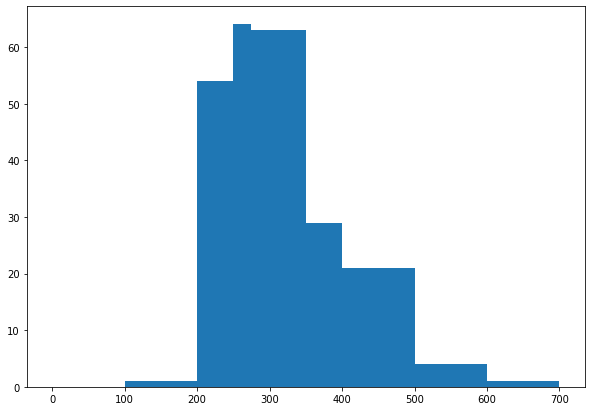

In [ ]:
import glob
import sys
import pandas
minlen = sys.maxsize
maxlen = -sys.maxsize -1
#path = "/content/drive/MyDrive/ColabNotebooks/Data/MTech_Data/Exp10_5KeyPress_MultipleTimes_20200228/all/"
path = "/content/drive/MyDrive/ColabNotebooks/Data/2022_60Trials_InstantPressAndRelease/"
fingers = ['1T', '2I', '3M', '4R', '5L']
filelen = []

#print(minlen)
for exp in fingers :
    files = glob.glob(path + exp + '/emg*.csv')    
    #print(files)    
    for file in files:
        emgData = pandas.read_csv(file)
        namepos = file.index('-')
        name = file[namepos:]
        length = len(emgData[emgData.columns[0]])
        filelen.append(length)
        if (minlen > length):
          minlen = length
          #print("name ={} {}".format(file, minlen))

        if (maxlen < length):
          maxlen = length
          #print("max name ={} {}".format(file, maxlen))
print("min = {}, max={}".format(minlen, maxlen))
#minlen = 500

#print(filelen)
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(filelen, bins = [0, 100, 200, 250, 275,300, 350, 400, 500, 600, 700])

#Data to Features

Things to cross check <br>
1.file path and classes in fingers <br>
2.sample_size <br>
3.logval len of sample [can be samplesize or maxFrameLength of all trials] 

In [ ]:
import scipy
#### Refactored Features

from google.colab import drive
drive.mount('/content/drive')
#path = "/content/drive/MyDrive/ColabNotebooks/Data/MTech_Data/Exp6_Myo5_20200221/"
#fingers= ['1_fingerspread','2_doubletap','3_wavein', '4_waveout','5_fist']

#path = "/content/drive/MyDrive/ColabNotebooks/Data/MTech_Data/Exp10_5KeyPress_MultipleTimes_20200228/all/"
path = "/content/drive/MyDrive/ColabNotebooks/Data/2022_60Trials_InstantPressAndRelease/"
fingers = ['1T', '2I', '3M', '4R', '5L']

#path = "/content/drive/MyDrive/ColabNotebooks/Data/SmallTrial/Day2/Multiple_PressAndRelease_5Sec/"
#fingers = ['1T', '2I', '3M', '4R', '5L']
import glob
import sys
import pandas
import math
import pandas
import numpy as np
import matplotlib.pyplot as plt

minFileLength = sys.maxsize
maxFileLength = -sys.maxsize -1
for action in fingers :
    files = glob.glob(path + action + '/emg*.csv')    
    #print(files)    
    for file in files:
        emgData = pandas.read_csv(file)
        namepos = file.index('-')
        name = file[namepos:]
        filelen = len(emgData[emgData.columns[0]])
        if (minFileLength > filelen):
          minFileLength = filelen
          #print("name ={} {}".format(file, minFileLength))
        if (maxFileLength < filelen):
          maxFileLength = filelen
print("Min = {}, Max={}".format(minFileLength, maxFileLength))
input_cols = ['Mean', 'Standard Deviation','Skewness', 'Kurtosis', 'Standard Error',
              'Mean Frequency','Median Frequency']
index =0 
minlen = 100
ENABLE_LOGS = False
for exp in fingers:
    files = glob.glob(path + exp + '/emg*.csv')
    result = []
    #result.append([])
    #result[0].append(input_cols)
    #result.append([])
    index = 0    
    if ENABLE_LOGS or True:
      print(files)
    for trial in files:
      if ENABLE_LOGS:
        print(trial)
      #if index > 0:
      #  break      
      emgData = pandas.read_csv(trial)      
      for data in emgData.columns:        
        #if ENABLE_LOGS and (index > 0):
        #  break    
        if not 'emg2' in data:
          continue
        complete_emg = emgData[data]
        if ENABLE_LOGS:
          print("Len={}".format(len(complete_emg)))
        #emg_frame = complete_emg[0:200]#[50:250]
        #for instant press release experiment take sample size as complete emg length for each trial
        if ("Instant" in path) or (len(complete_emg) < minlen):
          #sample_size = len(complete_emg)
          sample_size = 50
        else:
          sample_size = minlen
        for i in range(0, minFileLength, sample_size):
          result.append([])          
          emg = complete_emg[i:i+sample_size]
          emg = emg.dropna()
          emg_frame = emg
          
          #emg -= np.mean(emg) #skewness and kurtosis do not depends on mean
          emg_frame = pandas.to_numeric(emg_frame)
          
          #mean absolute value sum(x)
          mean = np.mean(abs(emg_frame))#/len(emg_frame)
          result[index].append(mean)
          
          #Standard Deviation
          std = np.std(emg_frame)
          result[index].append(std)
          
          #Skewness - is by taking the mean of the cubes of differences of each point from the mean
          #and then dividing it by the cube of the standard deviation.           
          skew = scipy.stats.skew(emg_frame, axis=0)
          result[index].append(skew)
          
          #Kurtosis
          kurt =scipy.stats.kurtosis(emg_frame,axis=0,fisher=False) 
          result[index].append(kurt)

          #standard error 
          sem = scipy.stats.sem(emg_frame)
          result[index].append(sem)
          
          #n is nearest power of 2 of len(emg)
          if True and ("Instant" in path):
            logval = math.log2(maxFileLength)
          else :
            logval = math.log2(sample_size)
          n= int(math.pow(2,math.ceil(logval)))#1024 #256 #4096 #512 #2048 #4096                     
          #print("{} {} {}".format(sample_size, logval, math.ceil(logval)))
          #print("samplelen={} n ={} logval ={}".format(sample_size, n, logval))
          
          #sampling_rate = 200
          #i/sampling_rate = (i/len(emg_frame))*(len(emg_frame)/sampling_rate)[time varies from 1/200 to 1]
          #time = np.array([i/sampling_rate for i in range(0, len(emg_frame), 1)])          
          #plt.plot(time, emg_frame)
          #plt.show()
          abs_fft = np.absolute(np.fft.fft(emg_frame, n=n))
          #avoid zero from fft before log
          if 0 in abs_fft:
            all_indexes = [a for a in range(len(abs_fft)) if abs_fft[a] == 0]
            #to find second min value to replace the 0
            abs_fft[all_indexes] = sys.maxsize
            #we may set to epsilon(usual flooring value) if second min can be higher
            minValue = min(abs_fft)
            abs_fft[all_indexes] = minValue
            if ENABLE_LOGS:
              print("Index {}".format(all_indexes))
              for i in all_indexes:
                print("{} is = to {}".format(i, abs_fft[i]))

          #spectrum has large dynamic range. lot of details in lower power spectral will be lost. 
          #to make sure dynamic range is properly maintained 20 (since psd is square rooted) *log
          log_abs_fft = np.log(abs_fft)
          ####Err -inf for few
          #shift_fft = np.fft.fftshift(log_abs_fft)
          if False:
            print("Before Shift {}".format(log_abs_fft))
            plt.plot(log_abs_fft)
            plt.show()
            #print("After Shift {}".format(shift_fft))
            #plt.plot(shift_fft)
            #plt.show()
          
          #print(abs_fft)
          psd = (1/n)*20*log_abs_fft          
          psd_x = np.array([i for i in range (0, n, 1)])
          if ENABLE_LOGS:
            print("Complete PSD")
            plt.plot(psd_x, psd)
            plt.show()
          
          #print("First half PSD")
          #plt.plot(psd_x[0:(int)(n/2)], psd[0:(int)(n/2)])
          #plt.psd(psd)
          #plt.show()
          
          psd_half = psd[0:(int)(n/2)]
          #print("Half {}".format(len(psd_half)))
          #print(psd_half)
          #Mean frequency sum(P)/M
          sumofpsd = np.sum(psd_half)    
          psd_half_pdf = psd_half/sumofpsd
          sumofpdf = np.sum(psd_half_pdf)
          
          if ENABLE_LOGS:
            plt.plot(psd_x[0:len(psd_half)], psd_half_pdf)
            plt.show()
            print(sumofpdf)
          
          arr_i = [i for i in range(0, len(psd_half),1)]
          e_i = psd_half_pdf
          e_sum = 0
          for t in range (0,len(psd_half),1):
            e_sum = e_sum + e_i[t]*arr_i[t]

          #if pd.isnull(e_sum):
            #print(psd_half)
            #print(emg_frame)
            
          meanfreq_idx = e_sum#/len(psd_half)
          meanfreq = (meanfreq_idx*100)/len(psd_half)          
          #if (pd.isnull(meanfreq)):
          #  print("{} {} {}".format(abs_fft, log_abs_fft, log_abs_fft[128]))
          
          e_sum = 0
          e_half = 1/2
          global_t =0
          
          for t in range (0,len(psd_half),1):
            e_sum = e_sum + e_i[t]
            if e_sum >= e_half:
              global_t = t
              break
              
          medfreq_idx = global_t-1
          medfreq = (medfreq_idx*100)/len(psd_half)
          result[index].append(meanfreq)
          result[index].append(medfreq)          
          index = index + 1
    
    np.where(result=='[', '', result)
    np.where(result==']', '', result)
    np.savetxt(path + str('Features_{}.csv'.format(exp)), result, delimiter=",", fmt='%s')
    print("Total Features Features_{} ={}".format(exp, index))

#OverLapping Window

In [ ]:
import scipy
#### Refactored Features

from google.colab import drive
drive.mount('/content/drive')
#path = "/content/drive/MyDrive/ColabNotebooks/Data/MTech_Data/Exp6_Myo5_20200221/"
#fingers= ['1_fingerspread','2_doubletap','3_wavein', '4_waveout','5_fist']

path = "/content/drive/MyDrive/ColabNotebooks/Data/2022_60Trials_InstantPressAndRelease/"
fingers = ['1T', '2I', '3M', '4R', '5L']

import glob
import sys
import pandas
import math
import pandas
import numpy as np
import matplotlib.pyplot as plt

minFileLength = sys.maxsize
maxFileLength = -sys.maxsize -1
for action in fingers :
    files = glob.glob(path + action + '/emg*.csv')    
    #print(files)    
    for file in files:
        emgData = pandas.read_csv(file)
        namepos = file.index('-')
        name = file[namepos:]
        filelen = len(emgData[emgData.columns[0]])
        if (minFileLength > filelen):
          minFileLength = filelen
          #print("name ={} {}".format(file, minFileLength))
        if (maxFileLength < filelen):
          maxFileLength = filelen
print("Min = {}, Max={}".format(minFileLength, maxFileLength))
input_cols = ['Mean', 'Standard Deviation','Skewness', 'Kurtosis', 'Standard Error',
              'Mean Frequency','Median Frequency']
index =0 
minlen = 100
ENABLE_LOGS = False
for exp in fingers:
    files = glob.glob(path + exp + '/emg*.csv')
    result = []
    index = 0    
    if ENABLE_LOGS or True:
      print(files)
    for trial in files:
      if ENABLE_LOGS:
        print(trial)
      #if index > 0:
      #  break      
      emgData = pandas.read_csv(trial)      
      for data in emgData.columns:        
        #if ENABLE_LOGS and (index > 0):
        #  break    
        if not 'emg2' in data:
          continue
        complete_emg = emgData[data]
        if ENABLE_LOGS:
          print("Len={}".format(len(complete_emg)))
        #emg_frame = complete_emg[0:200]#[50:250]
        #for instant press release experiment take sample size as complete emg length for each trial
        if ("Instant" in path) or (len(complete_emg) < minlen):
          #sample_size = len(complete_emg)
          sample_size = 50
        else:
          sample_size = minlen
        for i in range(0, minFileLength, (int)(sample_size*(0.50))): #50% overlap
          result.append([])          
          emg = complete_emg[i:i+sample_size]
          emg = emg.dropna()
          emg_frame = emg
          
          #emg -= np.mean(emg) #skewness and kurtosis do not depends on mean
          emg_frame = pandas.to_numeric(emg_frame)
          
          #mean absolute value sum(x)
          mean = np.mean(abs(emg_frame))#/len(emg_frame)
          result[index].append(mean)
          
          #Standard Deviation
          std = np.std(emg_frame)
          result[index].append(std)
          
          #Skewness - is by taking the mean of the cubes of differences of each point from the mean
          #and then dividing it by the cube of the standard deviation.           
          skew = scipy.stats.skew(emg_frame, axis=0)
          result[index].append(skew)
          
          #Kurtosis
          kurt =scipy.stats.kurtosis(emg_frame,axis=0,fisher=False) 
          result[index].append(kurt)

          #standard error 
          sem = scipy.stats.sem(emg_frame)
          result[index].append(sem)
          
          #n is nearest power of 2 of len(emg)
          if True and ("Instant" in path):
            logval = math.log2(maxFileLength)
          else :
            logval = math.log2(sample_size)
          n= int(math.pow(2,math.ceil(logval)))#1024 #256 #4096 #512 #2048 #4096                     
          #print("{} {} {}".format(sample_size, logval, math.ceil(logval)))
          #print("samplelen={} n ={} logval ={}".format(sample_size, n, logval))
          
          #sampling_rate = 200
          #i/sampling_rate = (i/len(emg_frame))*(len(emg_frame)/sampling_rate)[time varies from 1/200 to 1]
          #time = np.array([i/sampling_rate for i in range(0, len(emg_frame), 1)])          
          #plt.plot(time, emg_frame)
          #plt.show()
          abs_fft = np.absolute(np.fft.fft(emg_frame, n=n))
          #avoid zero from fft before log
          if 0 in abs_fft:
            all_indexes = [a for a in range(len(abs_fft)) if abs_fft[a] == 0]
            #to find second min value to replace the 0
            abs_fft[all_indexes] = sys.maxsize
            #we may set to epsilon(usual flooring value) if second min can be higher
            minValue = min(abs_fft)
            abs_fft[all_indexes] = minValue
            if ENABLE_LOGS:
              print("Index {}".format(all_indexes))
              for i in all_indexes:
                print("{} is = to {}".format(i, abs_fft[i]))

          #spectrum has large dynamic range. lot of details in lower power spectral will be lost. 
          #to make sure dynamic range is properly maintained 20 (since psd is square rooted) *log
          log_abs_fft = np.log(abs_fft)
          ####Err -inf for few
          #shift_fft = np.fft.fftshift(log_abs_fft)
          if False:
            print("Before Shift {}".format(log_abs_fft))
            plt.plot(log_abs_fft)
            plt.show()
            #print("After Shift {}".format(shift_fft))
            #plt.plot(shift_fft)
            #plt.show()
          
          #print(abs_fft)
          psd = (1/n)*20*log_abs_fft          
          psd_x = np.array([i for i in range (0, n, 1)])
          if ENABLE_LOGS:
            print("Complete PSD")
            plt.plot(psd_x, psd)
            plt.show()
          
          #print("First half PSD")
          #plt.plot(psd_x[0:(int)(n/2)], psd[0:(int)(n/2)])
          #plt.psd(psd)
          #plt.show()
          
          psd_half = psd[0:(int)(n/2)]
          #print("Half {}".format(len(psd_half)))
          #print(psd_half)
          #Mean frequency sum(P)/M
          sumofpsd = np.sum(psd_half)    
          psd_half_pdf = psd_half/sumofpsd
          sumofpdf = np.sum(psd_half_pdf)
          
          if ENABLE_LOGS:
            plt.plot(psd_x[0:len(psd_half)], psd_half_pdf)
            plt.show()
            print(sumofpdf)
          
          arr_i = [i for i in range(0, len(psd_half),1)]
          e_i = psd_half_pdf
          e_sum = 0
          for t in range (0,len(psd_half),1):
            e_sum = e_sum + e_i[t]*arr_i[t]

          #if pd.isnull(e_sum):
            #print(psd_half)
            #print(emg_frame)
            
          meanfreq_idx = e_sum#/len(psd_half)
          meanfreq = (meanfreq_idx*100)/len(psd_half)          
          #if (pd.isnull(meanfreq)):
          #  print("{} {} {}".format(abs_fft, log_abs_fft, log_abs_fft[128]))
          
          e_sum = 0
          e_half = 1/2
          global_t =0
          
          for t in range (0,len(psd_half),1):
            e_sum = e_sum + e_i[t]
            if e_sum >= e_half:
              global_t = t
              break
              
          medfreq_idx = global_t-1
          medfreq = (medfreq_idx*100)/len(psd_half)
          result[index].append(meanfreq)
          result[index].append(medfreq)          
          index = index + 1
    
    np.where(result=='[', '', result)
    np.where(result==']', '', result)
    np.savetxt(path + str('Features_{}.csv'.format(exp)), result, delimiter=",", fmt='%s')
    print("Total Features Features_{} ={}".format(exp, index))

In [ ]:
print(index)
print(fingers)

#ScatterPlot MNF and MDF

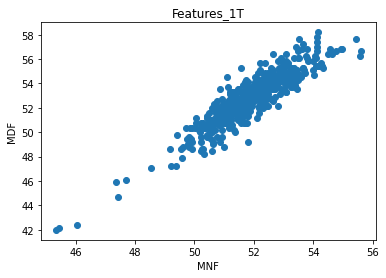

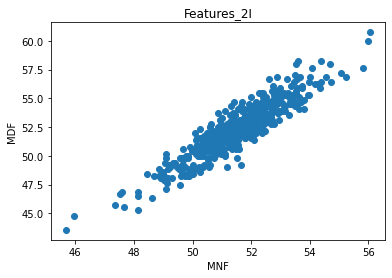

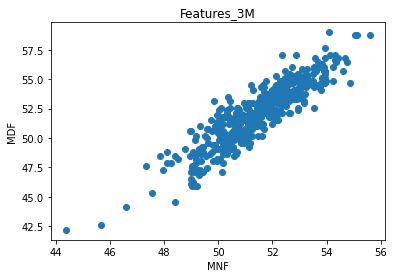

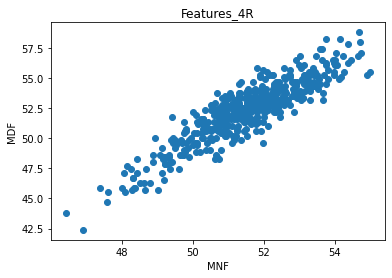

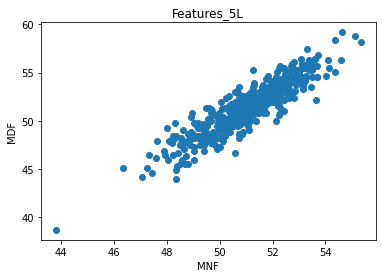

In [ ]:
features_scp = []
all_temp_scp = []
all_temp_scpY = []
features_scpY = []
for exp in fingers:
    fea = pandas.read_csv(path + 'Features_{}.csv'.format(exp), header=None)     
    fea_dropna =  fea.iloc[:,5:].dropna()        
    if True:
      plt.scatter(fea_dropna[5],fea_dropna[6])
      plt.title("Features_{}".format(exp))
      plt.xlabel("MNF")
      plt.ylabel("MDF")
      plt.show()    
    all_temp_scp.append(fea_dropna)
    all_temp_scpY.append([index]*len(fea_dropna))
    #print(len(fea_dropna))    
    index = int(exp[0])
    features_scpY = features_scpY + [index]*len(fea_dropna)    
#features_scp = pandas.concat(all_temp_scp)
#print("Length {} {} {}".format(len(features_scp), len(features_scp[5]), len(features_scp[6])))
#print("MultiClass {}".format(set(features_scpY)))
#plt.scatter(features_scp[5],features_scp[6], c=features_scpY)
plt.show()    

In [ ]:
# #print(len(all_temp_scp))
# #print(len(all_temp_scpY))
# for i in range(1,5,1):
#  for j in range(1,5,1):
#    if i == j:
#      continue
#    features_scpY = [all_temp_scp[i],all_temp_scp[j]]
#    #print(features_scpY)
#    plt.scatter(all_temp_scp[i][5],all_temp_scp[j][6], c=features_scpY)
# plt.show()    

#Histogram MNF and MDF

['1T', '2I', '3M', '4R', '5L']


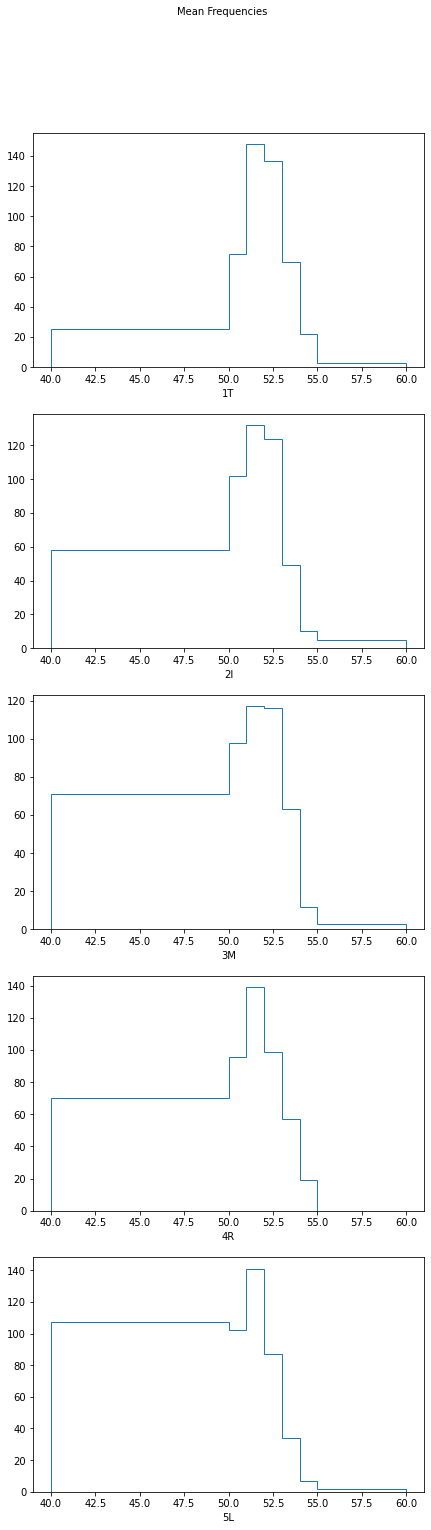

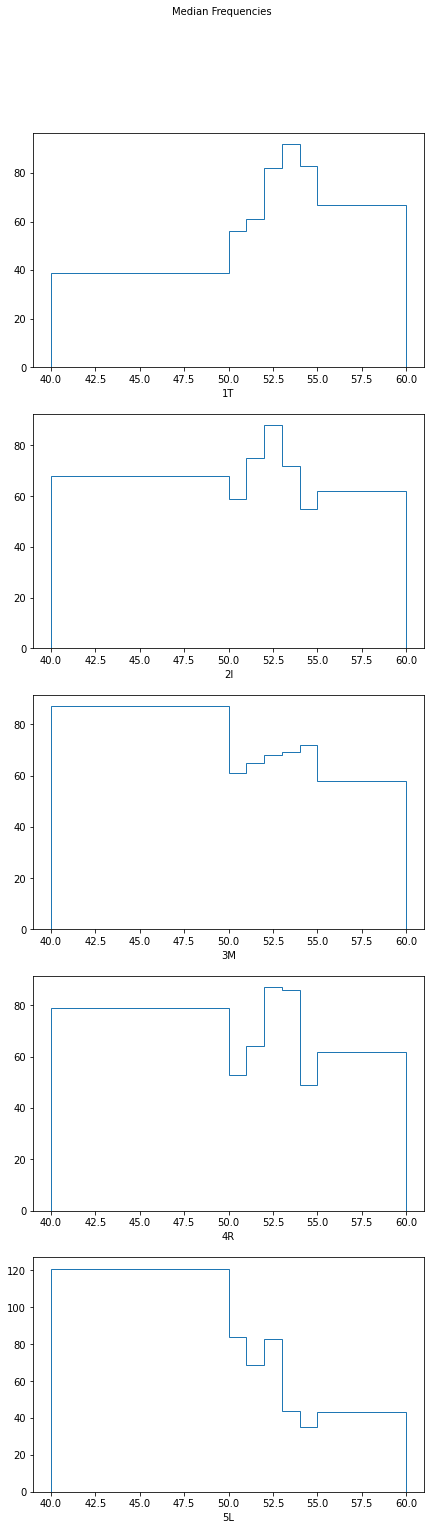

In [ ]:
# define subplot grid
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(7, 25))
#plt.subplots_adjust(hspace=0.1)
fig.suptitle("Mean Frequencies", fontsize=10, y=0.95)
print(fingers)
# loop through tickers and axes
for exp, ax in zip(fingers, axs.ravel()):
    fea = pandas.read_csv(path + 'Features_{}.csv'.format(exp), header=None)     
    fea_dropna =  fea.iloc[:,5:].dropna()            
    ax.hist(fea_dropna[5], bins = [40, 50, 51,52,53,54,55,60], histtype ='step')    
    ax.set_xlabel(exp)
plt.show()
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(7, 25))
fig.suptitle("Median Frequencies", fontsize=10, y=0.95)
for exp, ax in zip(fingers, axs.ravel()):
    fea = pandas.read_csv(path + 'Features_{}.csv'.format(exp), header=None)     
    fea_dropna =  fea.iloc[:,5:].dropna()            
    ax.hist(fea_dropna[6], bins = [40, 50, 51,52,53,54,55,60], histtype ='step')    
    ax.set_xlabel(exp)
plt.show()


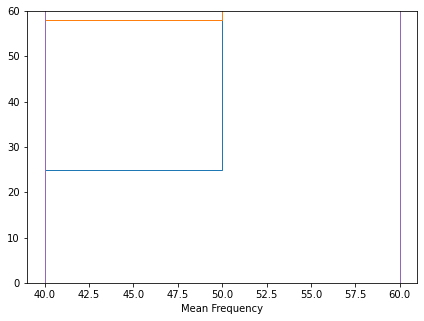

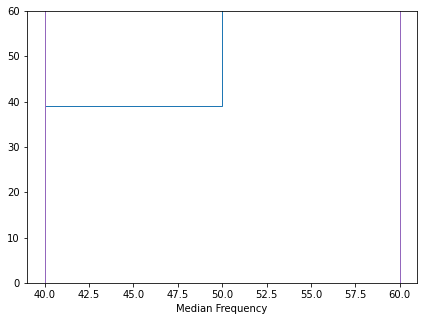

In [ ]:
fig, ax = plt.subplots(figsize =(7, 5))
fig1, ax1 = plt.subplots(figsize =(7, 5))
ax.set_xlabel("Mean Frequency")
ax.set_ylim(0, 60)    
ax1.set_xlabel("Median Frequency")
ax1.set_ylim(0, 60)

for exp in fingers:
    fea = pandas.read_csv(path + 'Features_{}.csv'.format(exp), header=None)     
    fea_dropna =  fea.iloc[:,5:].dropna()        
    #histtype = bar, step, stepfilled
    #ax.hist(fea_dropna[5], bins = [40, 50, 51,52,53,54,55, 60], histtype ='step')    
    ax.hist(fea_dropna[5], bins = [40, 50, 60], histtype ='step')    
    #ax1.hist(fea_dropna[6], bins = [40, 50, 51,52,53,54,55, 60], histtype ='step')
    ax1.hist(fea_dropna[6], bins = [40, 50, 60], histtype ='step')
#fig.show()
#fig1.show()

#TSNE 2D

In [ ]:
from numpy import random
import csv
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
fingers = ['1T', '2I', '3M','4R','5L']

path = "/content/drive/MyDrive/ColabNotebooks/Data/2022_60Trials_InstantPressAndRelease/Matlab_EMGT/Features_ShortFrameSize50_Overlap0/"
sampleData = False;
if sampleData:
  X1 = random.randint(-10,0, size=[500,2])
  X2 = random.randint(0,10, size=[500,2])
  X = np.concatenate((X1, X2))
  Y1 =[0]*500
  Y2 =[1]*500
  Ytrain_Plot = np.concatenate((Y1, Y2))
  palette = sns.color_palette("bright", 2)
  df = pd.DataFrame(X,columns=[0,1])
else :
  features = []
  featuresY = []
  Xtrain_Plot = []
  Ytrain_Plot = []  
  for exp in fingers:
    #fea = pandas.read_csv(path + 'Features_{}.csv'.format(exp), header=None)
    #fea = pd.read_excel(path + 'Features_{}.xls'.format(exp))
    fea = pd.read_excel(path + 'Features_{}.xls'.format(exp), header=0, usecols=['ar1', 'ar2','ar3', 'ar4'])
    print("Features_{} {} {}".format(exp, fea.shape, path))
    fea_dropna = fea.dropna()#
    #fea_dropna =  fea.iloc[:,0:5].dropna()#fea.iloc[0:400,0:5].dropna()
    features.append(fea_dropna)   
    #print(fea_dropna[0:5])
    index = int(exp[0])
    featuresY.append([index]*len(fea_dropna))
    
  Xtrain_Plot = np.concatenate(features)
  Ytrain_Plot = np.concatenate(featuresY)
  palette = sns.color_palette("bright", len(fingers))
  df = pd.DataFrame(Xtrain_Plot)
df_subset = df #df.loc[N,:].copy()


In [ ]:
#@title
data_subset = df_subset.values 
#perplexity 30 to 50
tsne = TSNE(n_components=2, verbose=1, perplexity=99, n_iter=750)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print(Xtrain_Plot.shape)

#ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue = Ytrain_Plot,
    palette=palette,
    data=df_subset,
    legend="full",
    alpha=0.3,
    )

#Random Forest Classification

In [ ]:
#print("Train {},{}, Validation {},{}, Test {},{}".format(X_Train.shape, Y_Train.shape, X_Val.shape, Y_Val.shape,  X_Test.shape, Y_Test.shape,))
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
tensorX = Xtrain_Plot
tensorY  = Ytrain_Plot
X_Train, Xfor_test, Y_Train, Yfor_test = train_test_split(tensorX, tensorY, test_size=0.3, random_state=42, stratify= tensorY)
#X_Train, Xfor_test, Y_Train, Yfor_test = train_test_split(tensorX, tensorY, test_size=0.1, random_state=42)
X_Val, X_Test, Y_Val, Y_Test = train_test_split(Xfor_test, Yfor_test, test_size=(2/3), random_state=42, stratify=Yfor_test)
print("Train {},{}, Validation {},{}, Test {},{}".format(X_Train.shape, Y_Train.shape, X_Val.shape, Y_Val.shape,  X_Test.shape, Y_Test.shape,))

from collections import Counter
print("Count Train={}, Val={}, Test={}".format(dict(Counter(Y_Train)), dict(Counter(Y_Val)), dict(Counter(Y_Test))))

X_Val = np.reshape(X_Val, (X_Val.shape[0], -1))
print("Squeeze for IP Channel {}, {}, {}".format(X_Train.shape, X_Test.shape, X_Val.shape))

sc = StandardScaler()  
X_train = sc.fit_transform(X_Train)  
X_val = sc.transform(X_Val)  
X_test = sc.transform(X_Test) 

lda = LDA(n_components=len(fingers)-1)  
X_trainlda = lda.fit_transform(X_train, Y_Train)  
#print('#class={} {} {}'.format(len(fingers), X_train.shape, X_trainlda.shape))
X_test = lda.transform(X_test)  
X_val = lda.transform(X_val)  


classifier = RandomForestClassifier(max_depth=6, n_estimators=20, random_state=0)
classifier.fit(X_trainlda, Y_Train)  
print('**********************************')
y_pred = classifier.predict(X_trainlda)  
print('Train Accuracy\t=' + str(accuracy_score(Y_Train, y_pred)*100)) 
y_pred = classifier.predict(X_val)  
print('Validation Accuracy' + str(accuracy_score(Y_Val, y_pred)*100)) 
y_pred = classifier.predict(X_test)  
print('Test Accuracy\t=' + str(accuracy_score(Y_Test, y_pred)*100)) 
print('**********************************')
print('Classes Predicted {}'.format(set(Y_Test)))
print(confusion_matrix(Y_Test, y_pred))

from sklearn.model_selection import cross_val_score, cross_val_predict
classifier.random_state = 0
scores = cross_val_score(classifier, tensorX, tensorY, cv=10)
print('CROSS VALIDATION \n Mean={} Std {} \n scores {}'.f\ormat(np.mean(scores),np.std(scores), scores)[''])